# Visualizing Frame Dragging in Kerr Spacetime

### Importing required modules

In [1]:
import numpy as np

from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting import StaticGeodesicPlotter

### Setting up the system
  - Initial position & momentum of the test partcle
  - Spin of the Kerr Black Hole
  - Other solver parameters
  
Note that, we are working in _M_-Units ($G = c = M = 1$). Also, setting momentum's $\phi$-component to negative, implies an initial retrograde trajectory.

In [2]:
position = [2.5, np.pi / 2, 0.]
momentum = [0., 0., -2.]
a = 0.99
end_lambda = 150.
step_size = 0.0005

### Calculating the geodesic, using the Julia back-end

In [3]:
geod = Nulllike(
    position=position,
    momentum=momentum,
    a=a,
    end_lambda=end_lambda,
    step_size=step_size,
    return_cartesian=True,
    julia=True
)

e:\coding\gsoc\github repos\myfork\einsteinpy\src\einsteinpy\geodesic\utils.py:307: RuntimeWarning:

Test particle has reached the Event Horizon. 



### Plotting the geodesic in 2D

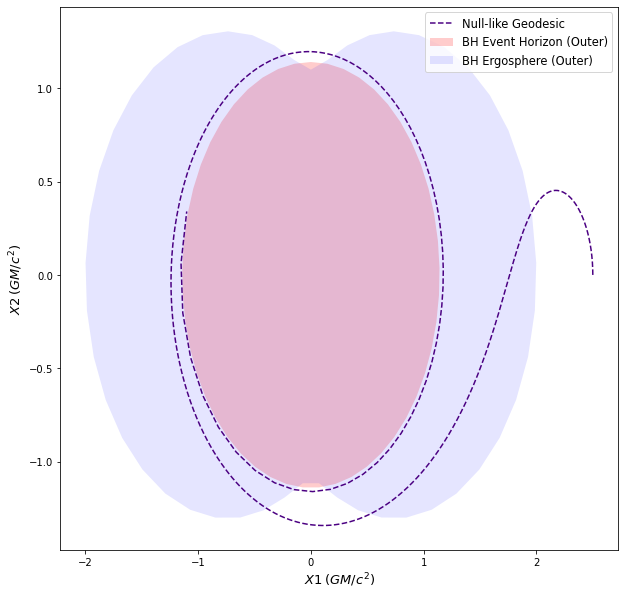

In [4]:
sgpl = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl.plot2D(geod, coordinates=(1, 2), figsize=(10, 10), color="indigo") # Plot X vs Y
sgpl.show()

As can be seen in the plot above, the photon's trajectory is reversed, due to frame-dragging effects, so that, it moves in the direction of the black hole's spin, before eventually falling into the black hole.